<title> What is the financial loss as the resource changes?</title>

<title> What is the financial loss as the resource changes? </title>

<title> Water and Life from Snow: A Trillion Dollar Science Question </title>

<h1> Water and Life from Snow: A Trillion Dollar Science Question </h1>

We examine snow water lost due to shifting patterns of winter precipitation and runoff. The question we ask is: What is the financial loss as the resource changes? Knowing the loss allows farmers, businesses, and policymakers to make rational decisions as to whether a particular replacement or adaption strategy is worthwhile (i.e., is the replacement cost greater than the loss itself?). The analysis combines (1) the amount and the rate of change of the snow resource (its trajectory) with (2) a present value (PV) analysis to account for the multiyear nature of the problem over time. To compute monetary values, we price snow water using a range of water purchase prices, and, because the current knowledge of the rates of change of most snow metrics is limited, multiple rate of climate change trajectories.

In [195]:
# Just importing some analysis libraries...

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('precision',2)
%matplotlib inline
plt.style.use('ggplot')

Even in a world with no inflation, people would prefer to get 100 dollars today instead of 100 dollars ten years from now, or to use 100 acre-feet of water today instead of using it ten years from now. This is the concept of time value, and it is why we see positive interest rates. In finance, the traditional way to deal with the diminishing value of money or commodities across time is through interest rates is through the concept of present value (PV), where the discount rate (r) governs how rapidly the value of an item in the future goes down to in the eyes of people valuing it today. We use a common range of discount rates (1 ,3, and 6%) to brackey our analysis and use them to compute Dt, the present value factor of something coming t years from now.

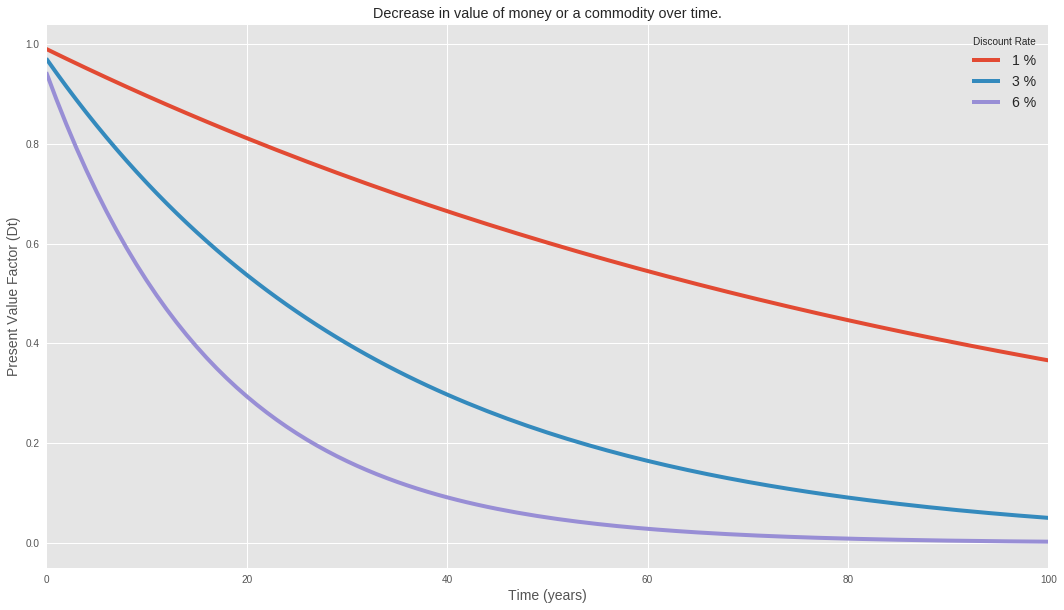

In [196]:
t = np.arange(1,1001,1) # Creating a span of time from the present to 1000 years in the future

# Computing present value factors for 1, 3, and 6% discount rates.
Dt1 = 1 / ((1 + 0.01) ** t)
Dt3 = 1 / ((1 + 0.03) ** t)
Dt6 = 1 / ((1 + 0.06) ** t)

plt.figure(figsize=(16,10))
plt.title('Decrease in value of money or a commodity over time.')
plt.ylabel('Present Value Factor (Dt)', fontsize=14)
plt.xlabel('Time (years)', fontsize=14)
plt.xlim(0,100)
plt.plot(Dt1, label = '1 %')
plt.plot(Dt3, label = '3 %')
plt.plot(Dt6, label = '6 %')
plt.legend(title='Discount Rate', fontsize=14)

We are interested in the Present Value $(PV)$ of all of the water (formerly useful snow, now use-less rain) needing to be replaced from today through distant future year $T$, we need to sum up the PV costs. We assume that the price of water $(P)$ remains constant over time. In each year  To compute the Present Value $(PV)$ of all of the water lost we can sum the product of the water lost $(W_t)$, and the $PV$ factor $(D_t)$ for each year and multiply that amount by the price of water, $P$.

$$V_0=P\sum_{t=1}^T W_t D_t$$

Now to make things easier, we assume that the full annual water loss, $W$, occurs at the end of some period of time determined by the climate trajectory. For instance, if the climate trajectory $(N)$ is 50 years, and total water lost is 1 Million Acre-Feet (1 MAF), then for year 50 and every year onward, $W$ (1 MAF) is lost. However, for every year from the present until year 50, only some fraction of that is lost. Water loss ($W_t)$ begins at 0 and increases each year by $W/N$ until the end of the trajectory where $W$ is lost each year. Thus, the water lost each year is the product of the total water loss and some fractional loss determined by the climate trajectory $(F_t)$:

$$W_t=F_tW_t$$

The fractional loss for a given climate trajectory, $F_N,_t$ is given by:

$$F_N,_t=\begin{cases}
            \frac{t}{N},\hspace{0.5cm} t\leq N,\\
            \\
            1,\hspace{0.5 cm} t>N
         \end{cases}$$

$W$ is a constant, so we can pull it outside the summation and rewrite the present value of all the water lost as:

$$V_0=P*W\sum_{t=1}^T F_t D_t$$

To generalize this for any water amount and price, we can establish a set of present value cost multipliers $V_{0_F}$:

$$V_{0_F}=\sum_{t=1}^T F_t D_t$$

In [197]:
# Here is a function to calculate present value cost multipliers. We provide the function
# with three inputs: 1) the climate trajectory, 2) the amount of years we want to calculate out into the future
# and 3) the discount rate (1, 3, or 6%).

def calc_cost_multipliers(trajectory, future, rate):
    
    # Creating some empty lists to store results
    cost_multipliers = []
    fractional_losses = []
    
    # Compute the fractional loss values
    for t in np.arange(1, future):
        if t <= trajectory:
            fractional_losses.append(t / trajectory)
        else: fractional_losses.append(1)
    
    t = 1
    
    # Compute the cost multipliers
    while t <= future:
        
        cost_multiplier = np.sum([x * y for x,y in zip(fractional_losses[:t], rate[:t])])      
        cost_multipliers.append(cost_multiplier)
        
        t += 1
    
    return (cost_multipliers)

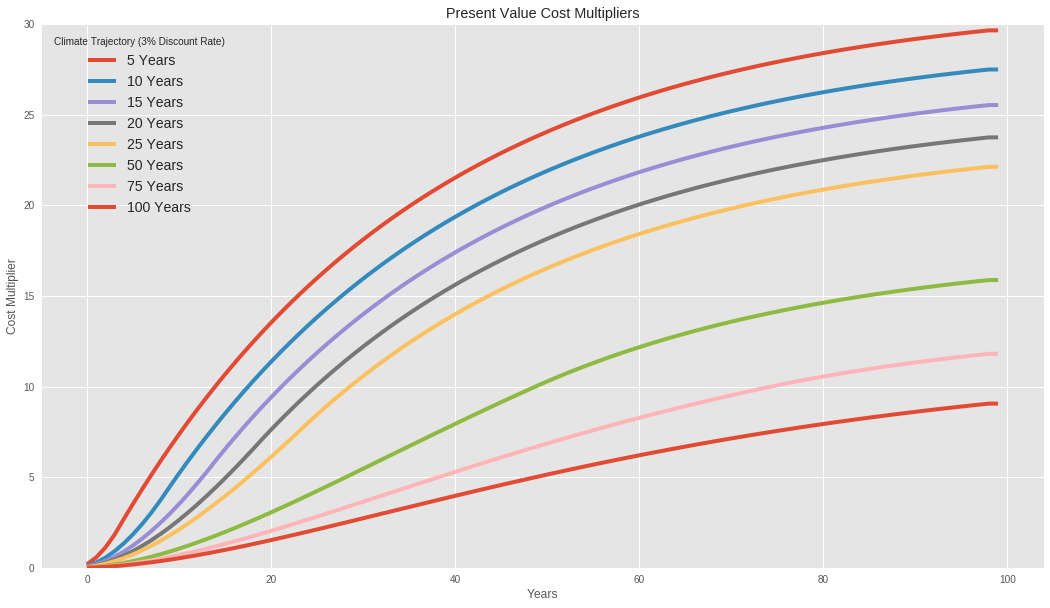

In [198]:
# Plot the cost multipliers at a 3% discount rate.

plt.figure(figsize=(16,10))
plt.plot(calc_cost_multipliers(5,100, Dt3), label='5 Years')
plt.plot(calc_cost_multipliers(10,100, Dt3), label='10 Years')
plt.plot(calc_cost_multipliers(15,100, Dt3), label='15 Years')
plt.plot(calc_cost_multipliers(20,100, Dt3), label='20 Years')
plt.plot(calc_cost_multipliers(25,100, Dt3), label='25 Years')
plt.plot(calc_cost_multipliers(50,100, Dt3), label='50 Years')
plt.plot(calc_cost_multipliers(75,100, Dt3), label='75 Years')
plt.plot(calc_cost_multipliers(100,100, Dt3), label='100 Years')
plt.ylim(0,30)
plt.xlabel('Years')
plt.ylabel('Cost Multiplier')
plt.legend(title='Climate Trajectory (3% Discount Rate)',fontsize=14)
plt.title('Present Value Cost Multipliers')


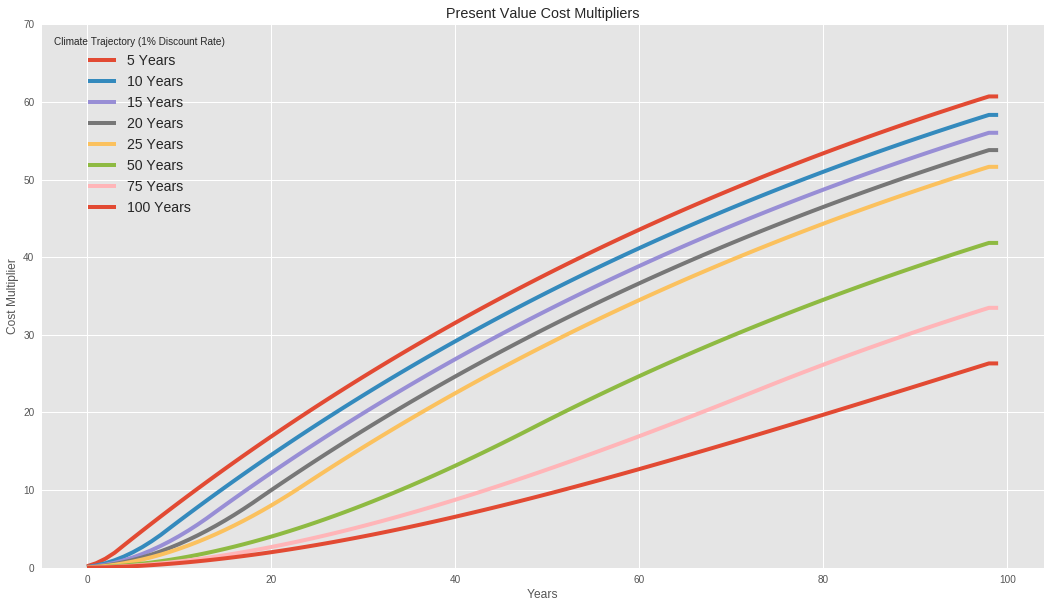

In [199]:
# Plot the cost multipliers at a 1% discount rate.

plt.figure(figsize=(16,10))
plt.plot(calc_cost_multipliers(5,100, Dt1), label='5 Years')
plt.plot(calc_cost_multipliers(10,100, Dt1), label='10 Years')
plt.plot(calc_cost_multipliers(15,100, Dt1), label='15 Years')
plt.plot(calc_cost_multipliers(20,100, Dt1), label='20 Years')
plt.plot(calc_cost_multipliers(25,100, Dt1), label='25 Years')
plt.plot(calc_cost_multipliers(50,100, Dt1), label='50 Years')
plt.plot(calc_cost_multipliers(75,100, Dt1), label='75 Years')
plt.plot(calc_cost_multipliers(100,100, Dt1), label='100 Years')
plt.ylim(0,70)
plt.xlabel('Years')
plt.ylabel('Cost Multiplier')
plt.legend(title='Climate Trajectory (1% Discount Rate)',fontsize=14)
plt.title('Present Value Cost Multipliers')

In [200]:
# Now we apply these multipliers to real amounts of water and with real ($) prices

def compute_cumulative_replacement_costs(water_amount, water_price, trajectory, future, rate):
    
    replacement_cost = water_price * water_amount * calc_cost_multipliers(trajectory, future, rate)[-1]
    
    return replacement_cost

In [202]:
compute_cumulative_replacement_costs(53900000, 900, 100, 1001, Dt3) / 1000000000000
# we divide by a trillion for units of trillions of dollars
# we can make this smart depending on the magnitudes we are working with

0.52628292830012324

In [203]:
trajectories = [5,10,15,20,25,50,75,100]
western_us_replacement_costs_900 = []
western_us_replacement_costs_200 = []
western_us_replacement_costs_900_Dt1 = []
western_us_replacement_costs_200_Dt1 = []


for N in trajectories:
    
    c = compute_cumulative_replacement_costs(53900000, 900, N, 1001, Dt3) / 1000000000000
    western_us_replacement_costs_900.append(c)
    

for N in trajectories:
    
    c = compute_cumulative_replacement_costs(53900000, 200, N, 1001, Dt3) / 1000000000000
    western_us_replacement_costs_200.append(c)
    
for N in trajectories:
    
    c = compute_cumulative_replacement_costs(53900000, 900, N, 1001, Dt1) / 1000000000000
    western_us_replacement_costs_900_Dt1.append(c)
    
for N in trajectories:
    
    c = compute_cumulative_replacement_costs(53900000, 200, N, 1001, Dt1) / 1000000000000
    western_us_replacement_costs_200_Dt1.append(c)

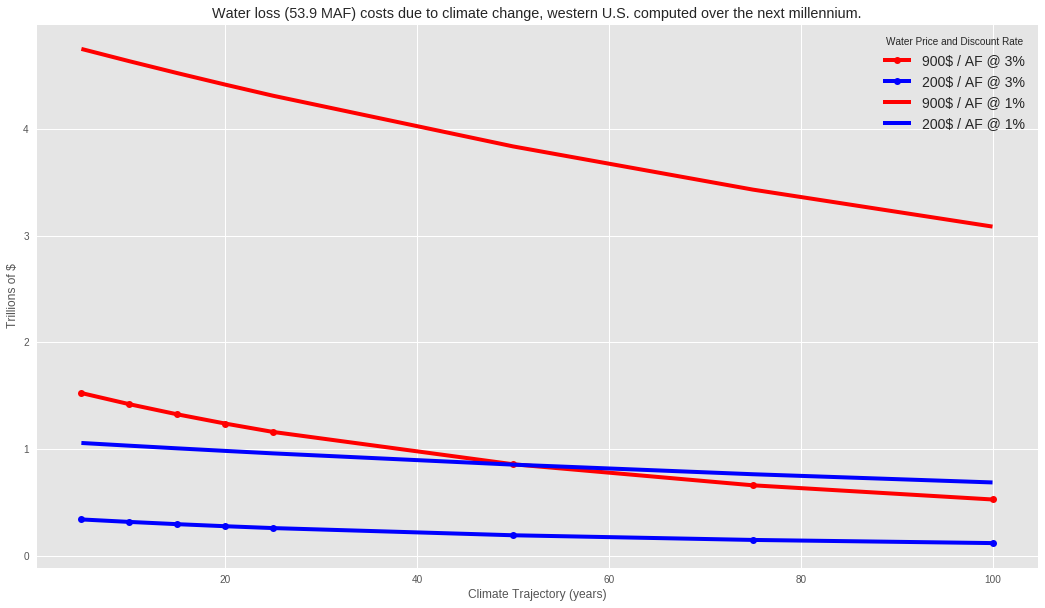

In [217]:
plt.figure(figsize=(16,10))
plt.plot(trajectories, western_us_replacement_costs_900, '-ro', label='900$ / AF @ 3%')
plt.plot(trajectories, western_us_replacement_costs_200, '-bo', label='200$ / AF @ 3%')
plt.plot(trajectories, western_us_replacement_costs_900_Dt1, '-rx', label='900$ / AF @ 1%')
plt.plot(trajectories, western_us_replacement_costs_200_Dt1, '-bx', label='200$ / AF @ 1%')
plt.ylabel('Trillions of $')
plt.xlabel('Climate Trajectory (years)')
plt.legend(title = 'Water Price and Discount Rate', fontsize=14)
plt.title('Water loss (53.9 MAF) costs due to climate change, western U.S. computed over the next millennium.')

In [218]:
ix = ['1%, 900$ / AF', '3%, 900$ / AF','1%, 200$ / AF', '3%, 200$ / AF']
df = pd.DataFrame(index = ix, columns = ['5 Years','10 Years','15 Years',
                                        '20 Years','25 Years','50 Years',
                                        '75 Years','100 Years'])


df.iloc[0] = western_us_replacement_costs_900_Dt1
df.iloc[1] = western_us_replacement_costs_900
df.iloc[2] = western_us_replacement_costs_200_Dt1
df.iloc[3] = western_us_replacement_costs_200

df

,5 Years,10 Years,15 Years,20 Years,25 Years,50 Years,75 Years,100 Years
"1%, 900$ / AF",4.8,4.6,4.5,4.4,4.3,3.8,3.4,3.1
"3%, 900$ / AF",1.5,1.4,1.3,1.2,1.2,0.86,0.66,0.53
"1%, 200$ / AF",1.1,1,1,0.98,0.96,0.85,0.76,0.69
"3%, 200$ / AF",0.34,0.32,0.29,0.28,0.26,0.19,0.15,0.12


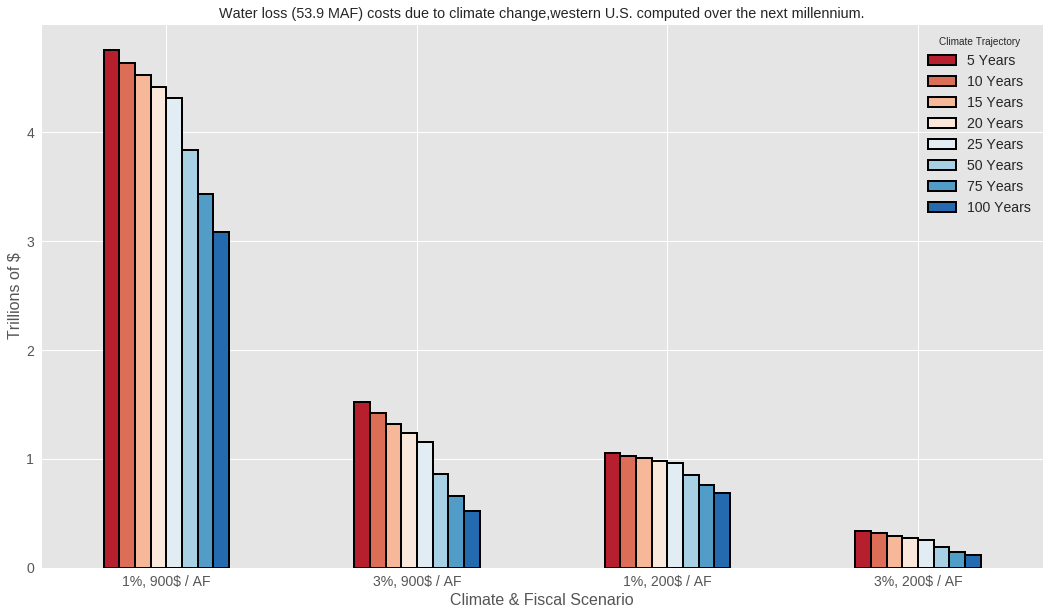

In [219]:
clrs = sns.color_palette('RdBu',8)

ax = df.plot.bar(figsize=(16,10), color=clrs, rot=0, fontsize=14, ec='k', lw=2.0)
ax.set_ylabel('Trillions of $', fontsize = 16)
ax.set_xlabel('Climate & Fiscal Scenario', fontsize = 16)
ax.legend(title = 'Climate Trajectory', fontsize=14)
ax.set_title('Water loss (53.9 MAF) costs due to climate change,\
western U.S. computed over the next millennium.')